<a href="https://colab.research.google.com/github/rahulsing/pytorch_demo/blob/master/6_Flowers_ResNet_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Transfer Learning:** The practice of re-using a trained neural network that solves a similar problem to yours, freezing the lower layers and only re-training the higher layer

** re-using a trained neural network:** aviods buliding NN architeture from scratch, also saves on time and effort of re-training from scratch
 
**Solves a similar problem to yours **: example : language translation, image recognization are classic example
          
*   Existing Model trained for English to Spanish translation, may be possible to use this for Hindi to English translation

**Freezing the lower layers**: Reuse as-is without even changing the parameter weights


Higher layer are most specific to your use case, mostly likely the number of output varies for different use cases though the use case similar, so needs to be re-trained
 

---



**Benifits of Transfer Learning: **

"Ride on the shoulders of gaints"
*   NN architecture
*   Choice of initalization
*  Activation Funcation
*  Number and density of Layers


"Do more with less"
Make do more with less data
- English to French - Lots of traning data
- Hindi to French -  Little or no training data


"Faster and cheaper"
Training process is far faster, easier
-smaller training data
-only higher layer to train
-in a cloud-enabled world, less-time => less memory


---









Supports for several famous NN architecture

**torchvision.model**

-Alexnet

-VGG

-ResNet

-Inception

-...



In [0]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.0.0-{platform}-linux_x86_64.whl torchvision

**ResNet**


Big Inovation - "Skip Connection"

Connect output of lower layer to far-ahead higher layers

Model is forced to focus on what is not learnt by intermdiate layers

Residual Learning



In [0]:
import torch
from torchvision import datasets, models, transforms

In [0]:
# https://pytorch.org/docs/stable/torchvision/models.html
# Imgaes fed to pre-trained models have to be normalized using these paramerts
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

In [0]:
train_transform=transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean,std)
])

test_transform=transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean,std)
])

In [27]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import zipfile
zip=zipfile.ZipFile("/content/gdrive/My Drive/datasets/flowers_.zip")
zip.extractall("datasets")

In [49]:
!ls datasets
#data_dir=""

daisy  dandelion  flowers_  __MACOSX  rose  sunflower  tulip


In [0]:
data_dir="datasets/flowers_"

In [0]:
image_datasets={}

In [0]:
image_datasets['train']=datasets.ImageFolder(data_dir+'/train',train_transform)

In [0]:
image_datasets['test']=datasets.ImageFolder(data_dir+'/test',test_transform)

In [55]:
print("Training data size - %d  " % len(image_datasets['train']))
print("Test data size - %d  " % len(image_datasets['test']))

Training data size - 3027  
Test data size - 1296  


In [57]:
class_names=image_datasets['train'].classes
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [58]:
image_datasets

{'test': Dataset ImageFolder
     Number of datapoints: 1296
     Root Location: datasets/flowers_/test
     Transforms (if any): Compose(
                              Resize(size=256, interpolation=PIL.Image.BILINEAR)
                              CenterCrop(size=(224, 224))
                              ToTensor()
                              Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                          )
     Target Transforms (if any): None, 'train': Dataset ImageFolder
     Number of datapoints: 3027
     Root Location: datasets/flowers_/train
     Transforms (if any): Compose(
                              Resize(size=256, interpolation=PIL.Image.BILINEAR)
                              RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
                              RandomHorizontalFlip(p=0.5)
                              ToTensor()
                              Normalize(mean=[0.485, 0.456,

In [0]:
dataloaders={}

In [0]:
dataloaders['train']=torch.utils.data.DataLoader(image_datasets['train'],batch_size=8,shuffle=True,num_workers=4)

In [0]:
dataloaders['test']=torch.utils.data.DataLoader(image_datasets['test'],batch_size=8,shuffle=True,num_workers=4)

In [63]:
dataloaders

{'test': <torch.utils.data.dataloader.DataLoader at 0x7f67ce1ae278>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x7f67ce1ae630>}

In [0]:
inputs,labels=next(iter(dataloaders['train']))

In [67]:
inputs.shape

torch.Size([8, 3, 224, 224])

In [69]:
import torchvision
inp=torchvision.utils.make_grid(inputs)
inp.max()

tensor(2.6400)

In [70]:
import numpy as np
np.clip(inp,0,1).max()

tensor(1.)

In [71]:
inp.numpy().transpose((1,2,0)).shape

(228, 1810, 3)

In [0]:
import matplotlib.pyplot as plt
plt.ion()

In [0]:
def img_show(inp,title=None):
  inp=inp.numpy().transpose((1,2,0))
  inp=std+inp+mean
  inp=np.clip(inp,0,1)
  
  plt.figure(figsize=(16,4))
  plt.axis('off')
  plt.imshow(inp)
  
  if title is not None:
     plt.title(title)

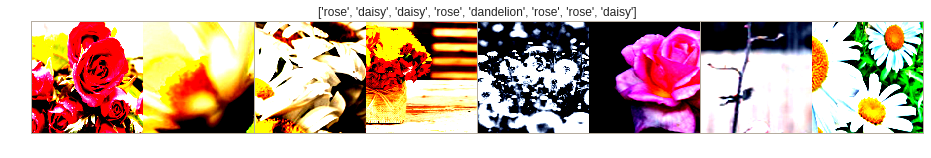

In [83]:
img_show(inp,title=[class_names[x] for x in labels])

In [0]:
!mkdir -p /root/.kaggle

In [0]:
!cp /root/kaggle.json /root/.kaggle/

In [0]:
#https://stackoverflow.com/questions/49310470/using-kaggle-datasets-into-google-colab
from google.colab import files
files.upload()

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
mohansacharya/graduate-admissions                             Graduate Admissions                                   9KB  2018-12-28 10:07:14           3298  
karangadiya/fifa19                                            FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59           2759  
fivethirtyeight/fivethirtyeight-comic-characters-dataset      FiveThirtyEight Comic Characters Dataset            577KB  2019-01-13 15:02:19            464  
xvivancos/barcelona-data-sets                                 Barcelona data sets                                   1MB  2018-12-13 14:16:53            767  
anokas/kuzushiji                                    

In [0]:
!kaggle datasets list -s flower

No datasets found
